# Machine Learning Project

**Data Description:** The heart disease dataset is sourced from a multispecialty hospital in India and was downloaded from Kaggle [(Link)](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset/data). It comprises data from 1,000 patients and includes 14 columns, capturing both personal details and clinical information. The features include demographic attributes such as age and gender, along with clinical parameters like chest pain type, resting blood pressure, serum cholesterol levels, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise (oldpeak), slope of the peak exercise ST segment, number of major vessels colored by fluoroscopy, and the target variable, presence of heart disease. 


**Domain:** HealthCare

**Problem Statement:** India accounts for 60% of the global heart disease burden, despite having less than 20% of the world’s population. The country’s age-standardized cardiovascular disease (CVD) death rate is 272 per 100,000—well above the global average of 235. Indians tend to develop CVDs nearly a decade earlier than people in Western nations. In 2016, CVDs were responsible for 28.1% of total deaths in India, up from 15.2% in 1990. With heart disease affecting Indians across age groups, digital tools for early detection are crucial. This dataset will support the development of predictive machine-learning models, aiding in early-stage heart disease detection to save lives through timely intervention.


**Attribute Information**
* **`Age`**: Age of the patient in completed years.  
* **`Gender`**: Gender of the patient (1: Male, 0: Female).  
* **`Chest Pain`**: Type of chest pain experienced by the patient:  
  - 1: Typical Angina  
  - 2: Atypical Angina  
  - 3: Non-Anginal Pain  
  - 4: Asymptomatic
* **`RestingBP`**: Resting blood pressure in mm Hg.  
* **`Serum Cholesterol`**: Serum cholesterol level in mg/dl.  
* **`Fasting Blood Sugar`**: Fasting blood sugar > 120 mg/dl (1: True, 0: False).  
* **`Resting Electro`**: Results of the resting electrocardiogram:  
  - 0: Normal  
  - 1: Having ST-T wave abnormality  
  - 2: Showing probable or definite left ventricular hypertrophy.  
* **`Max Heart Rate`**: Maximum heart rate achieved during exercise.  
* **`Exercise Angina`**: Exercise-induced angina (1: Yes, 0: No).  
* **`Oldpeak`**: ST depression induced by exercise relative to rest.  
* **`Slope`**: The slope of the peak exercise ST segment:  
  - 1: Upsloping  
  - 2: Flat  
  - 3: Downsloping  
* **`noofmajorvessels`**: Number of major vessels (0–3) colored by fluoroscopy.  
* **`Target`**: Diagnosis of heart disease (1: Presence, 0: Absence).

**Learning Outcomes**
* Exploratory Data Analysis
* Building ML classification model
* Hyperparameter tuning
* Implementing Basic ANN model and comparison between ML and ANN model

In [5]:
import numpy as np,pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PowerTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report,f1_score
import pickle

In [25]:
df = pd.read_csv(r'C:\Users\user\Downloads\New folder\Cardiovascular_Disease_Dataset (1).csv')

In [27]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


#### **Obsevation-1:** **The dataframe has 1000 rows and 14 columns. It doesnot have any null values.**

### Data Cleaning

**The dataframe contains 7 categorical columns, all of which are filled with discrete numerical values. This can create confusion for users in understanding which number corresponds to which category in each column.** 

**To improve code readability and make the dataframe more user-friendly, the discrete numerical values in the categorical columns were replaced with their corresponding text labels.**

In [31]:
df.drop(columns = ['patientid'],inplace = True)   #Represents ID, No importance in prediction

In [33]:
df['gender'] = np.where(df['gender'] == 0, 'Female', 'Male')

In [35]:
df['chestpain'] = np.where(df['chestpain']==0,'Typical_angina',np.where(df['chestpain']==1,'Atypical_angina',np.where(df['chestpain']==2,'Non-anginal_pain','Asymptomatic')))

In [41]:
df['restingrelectro'] = np.where(df['restingrelectro']==0,'Normal',np.where(df['restingrelectro']==1,'ST-T_wave_abnormality','Left_ventricular_hypertrophy'))

In [47]:
df['exerciseangia'] = np.where(df['exerciseangia']==0,'No','Yes')

In [53]:
df['slope'] = np.where(df['slope']==1,'Upsloping',np.where(df['slope']==2,'Flat','Downsloping'))

In [59]:
df['fastingbloodsugar'] = np.where(df['fastingbloodsugar']==0,'No','Yes')

In [65]:
df['noofmajorvessels'] = np.where(df['noofmajorvessels']==0,'Zero',np.where(df['noofmajorvessels']==1,'One',np.where(df['noofmajorvessels']==2,'Two','Three')))

In [69]:
df.rename(columns={'target': 'heartdisease'}, inplace=True)    # Renaming the column for better readbility

In [73]:
df['heartdisease'] = np.where(df['heartdisease']==0,'Absent','Present')

In [170]:
df.to_csv(r'CLEANED_Cardiovascular_Disease_Dataset(2).csv',index = False)   #Saving the dataframe for future use

### Exploratory Data Analysis

In [85]:
df = pd.read_csv(r'C:\Users\user\Downloads\New folder\CLEANED_Cardiovascular_Disease_Dataset(2).csv') #Loading the cleaned dataframe

In [101]:
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,heartdisease
0,53,Male,Non-anginal_pain,171,0,No,ST-T_wave_abnormality,147,No,5.3,Downsloping,Three,Present
1,40,Male,Typical_angina,94,229,No,ST-T_wave_abnormality,115,No,3.7,Upsloping,One,Absent
2,49,Male,Non-anginal_pain,133,142,No,Normal,202,Yes,5.0,Upsloping,Zero,Absent
3,43,Male,Typical_angina,138,295,Yes,ST-T_wave_abnormality,153,No,3.2,Flat,Two,Present
4,31,Male,Atypical_angina,199,0,No,Left_ventricular_hypertrophy,136,No,5.3,Downsloping,Two,Present


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   object 
 2   chestpain          1000 non-null   object 
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   object 
 6   restingrelectro    1000 non-null   object 
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   object 
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   object 
 11  noofmajorvessels   1000 non-null   object 
 12  heartdisease       1000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 101.7+ KB


In [121]:
for i in df.columns:
    if df[i].dtype == 'O':
        print('column name : ',i)
        print("unique values: ", df[i].unique())
        print('*'*20)

column name :  gender
unique values:  ['Male' 'Female']
********************
column name :  chestpain
unique values:  ['Non-anginal_pain' 'Typical_angina' 'Atypical_angina' 'Asymptomatic']
********************
column name :  fastingbloodsugar
unique values:  ['No' 'Yes']
********************
column name :  restingrelectro
unique values:  ['ST-T_wave_abnormality' 'Normal' 'Left_ventricular_hypertrophy']
********************
column name :  exerciseangia
unique values:  ['No' 'Yes']
********************
column name :  slope
unique values:  ['Downsloping' 'Upsloping' 'Flat']
********************
column name :  noofmajorvessels
unique values:  ['Three' 'One' 'Zero' 'Two']
********************
column name :  heartdisease
unique values:  ['Present' 'Absent']
********************


In [98]:
df.describe()

,age,restingBP,serumcholestrol,maxheartrate,oldpeak
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,151.747000,311.447000,145.477000,2.707700
std,17.86473,29.965228,132.443801,34.190268,1.720753
min,20.00000,94.000000,0.000000,71.000000,0.000000
25%,34.00000,129.000000,235.750000,119.750000,1.300000
50%,49.00000,147.000000,318.000000,146.000000,2.400000
75%,64.25000,181.000000,404.250000,175.000000,4.100000
max,80.00000,200.000000,602.000000,202.000000,6.200000


#### Observation 2 - information on the type of variable and min-max values
* **`age`**: numerical data. Whether it's discrete or continuous depends on whether they are measured to the nearest year or not. At present, it seems it's discrete. Min age in the dataset being 20 and max being 80.
* **`gender`**: categorical nominal(binary) data. Gender can be either 'Male' or 'Female'.
* **`chestpain`**: categorical nominal data. Categories include 'Non-anginal_pain', 'Typical_angina', 'Atypical_angina' and 'Asymptomatic'.
* **`restingBP`**: discrete numerical data. Min restingBP being 20 mmHg and max being 200 mmHg.
* **`serumcholesterol`**: discrete numerical data. Min serumcholesterol being 0 mg/dL (means no serumcholesterol) and max being 602 mg/dL.
* **`fastingbloodsugar`**: categorical nominal data. If fasting blood sugar > 120 mg/dL then 'Yes' else 'No'.
* **`restingelectro`**: categorical nominal(binary) data. Categories include 'ST-T_wave_abnormality' 'Normal' 'Left_ventricular_hypertrophy.
* **`maxheartrate`**: discrete numerical data. Min heartrate being 71 bpm and max being 202 bpm.
* **`exerciseangina`**: categorical nominal(binary) data. If exerciseangina is present then 'Yes' else 'No'.
* **`oldpeak`**: continuous numerical data. Min oldpeak value being 0 (means no oldpeak) and max being 6.2.
* **`slope`**: categorical nominal data. Categories include 'Downsloping' 'Upsloping' 'Flat'.
* **`noofmajorvessels`**: categorical ordinal data. Categories include 'Three' 'One' 'Zero' 'Two'.
* **`heartdisease`**: categorical nominal(binary) data. If heartdisease is present then 'Present' else 'Absent'.

#### Observation 3 - Descriptive Statistics for the numerical variables

* **`age`**: Range of Q1 to Q3 is between 34 to 64.25. Since the mean is almost similar to median, we can say that age is normally distributed.
* **`restingBP`**: Range of Q1 to Q3 is between 129 to 181. Since mean is greater than median, we can say that restingBP is right (positively) skewed.
* **`serumcholesterol`**: Range of Q1 to Q3 is between 235.75 to 404.25. Since mean is less than median, we can say that serumcholesterol is left (negetively) skewed.
* **`maxheartrate`**: Range of Q1 to Q3 is between 119.75 to 175. Since the mean is almost similar to median, we can say that maxheartrate is normally distributed.
* **`oldpeak`**: Range of Q1 to Q3 is between 1.3 to 4.1. Since mean is greater than median, we can say that oldpeak is right (positively) skewed.

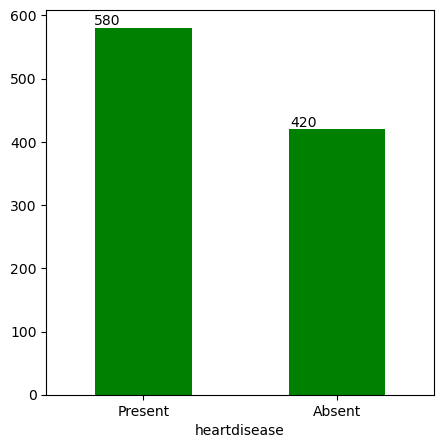

In [183]:
ax = df['heartdisease'].value_counts().plot(kind = 'bar',color ='green',figsize = (5,5),fontsize = 10,rot = 0)
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.show()

#### Observation 4 - Distribution of target variable
Among 1000 patients, 580 (=58%) have heart disease and 420 (=42%) doesnot have heart disease. Hence the dataset is mostly balanced. 

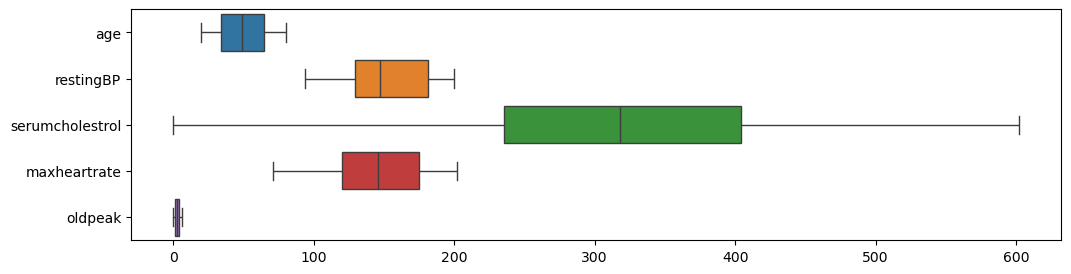

In [306]:
plt.figure(figsize = (12,3))
sns.boxplot(df,orient = 'h')
plt.show()

#### Observation 5 - Outliers Detection
* No outliers in numerical columns.

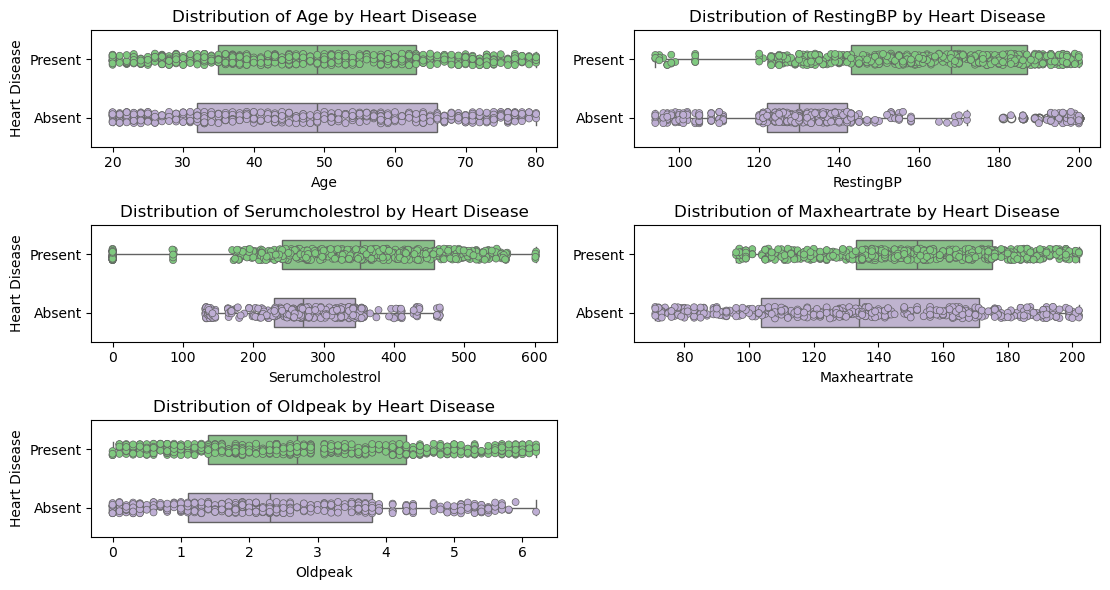

In [300]:
plt.figure(figsize = (11.2,6))
plt.subplot(3,2,1)
sns.boxplot(x='age', y='heartdisease', data=df, palette='Accent', width=0.5, orient='h',hue = 'heartdisease')
sns.stripplot(x='age', y='heartdisease', data=df, hue='heartdisease',
    palette='Accent', jitter=True, dodge=False, linewidth=0.5, orient='h')
plt.title('Distribution of Age by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.subplot(3,2,2)
sns.boxplot(x='restingBP', y='heartdisease', data=df, palette='Accent', width=0.5, orient='h',hue = 'heartdisease')
sns.stripplot(x='restingBP', y='heartdisease', data=df, hue='heartdisease',
    palette='Accent', jitter=True, dodge=False, linewidth=0.5, orient='h')
plt.title('Distribution of RestingBP by Heart Disease')
plt.xlabel('RestingBP')
plt.ylabel('')
plt.subplot(3,2,3)
sns.boxplot(x='serumcholestrol', y='heartdisease', data=df, palette='Accent', width=0.5, orient='h',hue = 'heartdisease')
sns.stripplot(x='serumcholestrol', y='heartdisease', data=df, hue='heartdisease',
    palette='Accent', jitter=True, dodge=False, linewidth=0.5, orient='h')
plt.title('Distribution of Serumcholestrol by Heart Disease')
plt.xlabel('Serumcholestrol')
plt.ylabel('Heart Disease')
plt.subplot(3,2,4)
sns.boxplot(x='maxheartrate', y='heartdisease', data=df, palette='Accent', width=0.5, orient='h',hue = 'heartdisease')
sns.stripplot(x='maxheartrate', y='heartdisease', data=df, hue='heartdisease',
    palette='Accent', jitter=True, dodge=False, linewidth=0.5, orient='h')
plt.title('Distribution of Maxheartrate by Heart Disease')
plt.xlabel('Maxheartrate')
plt.ylabel('')
plt.subplot(3,2,5)
sns.boxplot(x='oldpeak', y='heartdisease', data=df, palette='Accent', width=0.5, orient='h',hue = 'heartdisease')
sns.stripplot(x='oldpeak', y='heartdisease', data=df, hue='heartdisease',
    palette='Accent', jitter=True, dodge=False, linewidth=0.5, orient='h')
plt.title('Distribution of Oldpeak by Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Heart Disease')
plt.tight_layout()
plt.show()

#### Observation 6 - Numerical Columns Analysis

1. **Age**:  
   * The median age of individuals with heart disease is similar to that of healthy individuals, indicating no strong difference in central       tendency.  
   * The spread and count of data points (distribution) a is also consistent across the entire range of ages, suggesting that age might not       be a significant predictor of heart disease.

2. **RestingBP**:
   * The median restingBP value for diseased indivisuals is higher than those of healthy individuals.
   * The IQR for diseased indivisuals is wider comapred to healthy indivisuals. This indicates higher variability.
   * The number of datapoints is more in diseased patients and distribution is towards higher end of restingBP range.
   * The number of datapoints is less in healthy patients and distribution is towards lower end of restingBP range.
   * This indicates that RestingBP might be a significant predictor of heart disease.
  
3. **Serumcholestrol**:
   * The median serum cholestrol value for diseased indivisuals is higher than those of healthy individuals.
   * The distribution of cholesterol levels is noticeably broader for individuals with heart disease, with higher maximum values compared to      healthy individuals.
   * Despite the overlap in the IQR, the tendency for higher cholesterol in diseased individuals suggests it might play a role in predicting      heart disease when combined with other factors.

5. **Maxheartrate**:
   * The median max heart rate value for diseased indivisuals is higher than those of healthy individuals.
   * The IQR (spread) for healthy indivisuals is wider comapred to diseased indivisuals.
   * The number of datapoints is more in healthy patients as compared to diseased patients.
   * it might play a role in predicting heart disease when combined with other factors.

6. **Oldpeak (ST Depression)**:
   * The median oldpeak of individuals with heart disease is similar to that of healthy individuals, indicating no strong difference in           central tendency.  
   * The spread and count of data points (distribution) a is also consistent across the entire range, suggesting that oldpeak might not           be a significant predictor of heart disease.

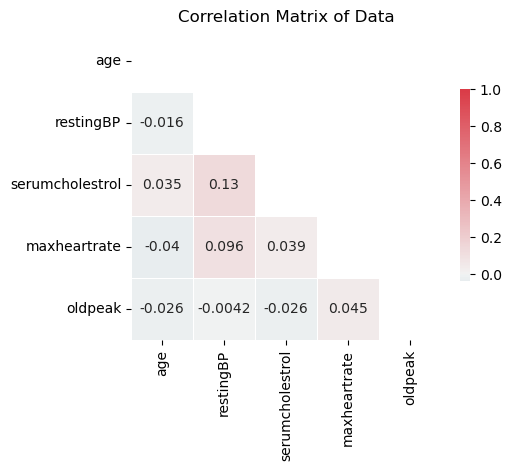

In [345]:
corr = df.corr(numeric_only = True)
mask = np.zeros_like(corr, dtype = 'bool')
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (5,5))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')
plt.show()

#### Observation 7 - Correalation matrix
* Numerical columns have little to no correlation among each other.

In [179]:
from scipy.stats import chi2_contingency
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('heartdisease')


for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['heartdisease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for Independence between {col} and heartdisease:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("-----------------------------")

Chi-Square Test for Independence between gender and heartdisease:
Chi2 statistic: 0.17902326822960438
P-value: 0.6722139754451182
Degrees of freedom: 1
-----------------------------
Chi-Square Test for Independence between chestpain and heartdisease:
Chi2 statistic: 333.76434731114534
P-value: 4.885941801865815e-72
Degrees of freedom: 3
-----------------------------
Chi-Square Test for Independence between fastingbloodsugar and heartdisease:
Chi2 statistic: 90.60953814455968
P-value: 1.750146562208855e-21
Degrees of freedom: 1
-----------------------------
Chi-Square Test for Independence between restingrelectro and heartdisease:
Chi2 statistic: 186.67003201617422
P-value: 2.9182169746963627e-41
Degrees of freedom: 2
-----------------------------
Chi-Square Test for Independence between exerciseangia and heartdisease:
Chi2 statistic: 1.4324629850892039
P-value: 0.23136289827241166
Degrees of freedom: 1
-----------------------------
Chi-Square Test for Independence between slope and hea

In [181]:
from scipy.stats import kruskal

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

for col in numerical_cols:
    groups = [df[col][df['heartdisease'] == 'Absent'], df[col][df['heartdisease'] == 'Present']]
    statistic, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis Test for {col} vs. heartdisease:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")
    print("-----------------------------")

Kruskal-Wallis Test for age vs. heartdisease:
Statistic: 0.09442878688498406
P-value: 0.7586206121704402
-----------------------------
Kruskal-Wallis Test for restingBP vs. heartdisease:
Statistic: 235.39188188530127
P-value: 3.976681770142202e-53
-----------------------------
Kruskal-Wallis Test for serumcholestrol vs. heartdisease:
Statistic: 61.75577804094387
P-value: 3.888089407449332e-15
-----------------------------
Kruskal-Wallis Test for maxheartrate vs. heartdisease:
Statistic: 40.817175073405835
P-value: 1.6715751363084772e-10
-----------------------------
Kruskal-Wallis Test for oldpeak vs. heartdisease:
Statistic: 10.266161564566122
P-value: 0.0013549240398388733
-----------------------------


In [360]:
X = df.drop(columns = ['heartdisease'])
y = df['heartdisease']

In [362]:
cont_pl = Pipeline(steps=[('SimpleImputer',SimpleImputer(missing_values=np.nan,strategy = 'mean')),
                          ('Scaling',MinMaxScaler()),
                         ('Transformation', PowerTransformer(standardize=False))])

cat_nominal_pl = Pipeline(steps = [('SimpleImputer',SimpleImputer(strategy = 'most_frequent')),
                                   ('OneHotEncoding',OneHotEncoder(drop = 'first',sparse_output = False,handle_unknown = 'ignore'))])

cat_ordinal_pl = Pipeline(steps = [('SimpleImputer',SimpleImputer(strategy = 'most_frequent')),
                                   ("Ordinal Encoding",OrdinalEncoder(categories=[['Zero','One','Two','Three']],handle_unknown="use_encoded_value",
                                 unknown_value=-1,
                                 encoded_missing_value=-5))])

In [364]:
ct = ColumnTransformer(transformers=[(' Cont_Col_transform',cont_pl,[0,3,4,7,9]),
                                    ('Cat_nom_Col_transform',cat_nominal_pl,[1,2,5,6,8,10]),
                                    ('Cat_Ord_Col_transform',cat_ordinal_pl,[11])],
                       remainder = 'passthrough')

In [366]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train_transformed = pd.DataFrame(ct.fit_transform(X_train),columns = ct.get_feature_names_out(),index = X_train.index)
X_test_transformed = pd.DataFrame(ct.transform(X_test),columns = ct.get_feature_names_out(),index = X_test.index)

In [368]:
X_train_transformed.head()

,Cont_Col_transform__age,Cont_Col_transform__restingBP,Cont_Col_transform__serumcholestrol,Cont_Col_transform__maxheartrate,Cont_Col_transform__oldpeak,Cat_nom_Col_transform__gender_Male,Cat_nom_Col_transform__chestpain_Atypical_angina,Cat_nom_Col_transform__chestpain_Non-anginal_pain,Cat_nom_Col_transform__chestpain_Typical_angina,Cat_nom_Col_transform__fastingbloodsugar_Yes,Cat_nom_Col_transform__restingrelectro_Normal,Cat_nom_Col_transform__restingrelectro_ST-T_wave_abnormality,Cat_nom_Col_transform__exerciseangia_Yes,Cat_nom_Col_transform__slope_Flat,Cat_nom_Col_transform__slope_Upsloping,Cat_Ord_Col_transform__noofmajorvessels
29,0.435036,0.854031,1.129680,0.531429,0.373047,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
535,0.541730,0.328367,0.628749,0.588656,0.308274,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
695,0.606149,0.813103,0.619634,0.588656,0.262103,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0
557,0.554747,0.130245,0.238894,0.909805,0.120279,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
836,0.337597,0.519791,0.698051,0.456647,0.330433,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


accuracy_score_Logistic_Regression:  0.935


f1_score_Logistic_Regression :  0.9437229437229437


classification_report_Logistic_Regression : 

               precision    recall  f1-score   support

      Absent       0.91      0.94      0.92        83
     Present       0.96      0.93      0.94       117

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



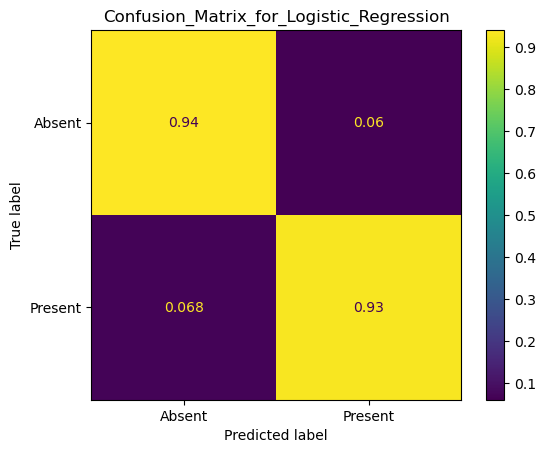

In [211]:
lr = LogisticRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
accuracy_score_lr = accuracy_score(y_test,y_pred)
print("accuracy_score_Logistic_Regression: ",accuracy_score_lr)
print('\n')
print("f1_score_Logistic_Regression : ",f1_score(y_test,y_pred,pos_label = 'Present'))
print('\n')
print("classification_report_Logistic_Regression : ")
print("\n",classification_report(y_test,y_pred,target_names=['Absent','Present']))
cm = confusion_matrix(y_test,y_pred,labels = lr.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = lr.classes_)
disp.plot()
plt.title('Confusion_Matrix_for_Logistic_Regression')
plt.show()

accuracy_score_KNN:  0.93


f1_score_KNN :  0.9401709401709402


classification_report_KNN : 

               precision    recall  f1-score   support

      Absent       0.92      0.92      0.92        83
     Present       0.94      0.94      0.94       117

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



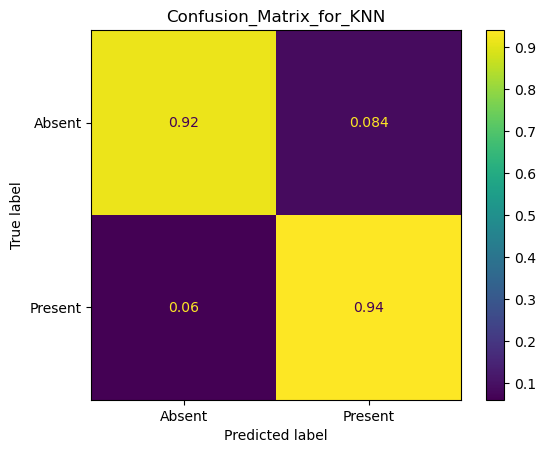

In [225]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_transformed,y_train)
y_pred = knn.predict(X_test_transformed)
accuracy_score_knn = accuracy_score(y_test,y_pred)
print("accuracy_score_KNN: ",accuracy_score_knn)
print('\n')
print("f1_score_KNN : ",f1_score(y_test,y_pred,pos_label = 'Present'))
print('\n')
print("classification_report_KNN : ")
print("\n",classification_report(y_test,y_pred,target_names=['Absent','Present']))
cm = confusion_matrix(y_test,y_pred,labels = knn.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = knn.classes_)
disp.plot()
plt.title('Confusion_Matrix_for_KNN')
plt.show()

accuracy_score_Decision_Tree:  0.92


f1_score_Decision_Tree:  0.9316239316239316


classification_report_Decision_Tree : 

               precision    recall  f1-score   support

      Absent       0.90      0.90      0.90        83
     Present       0.93      0.93      0.93       117

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



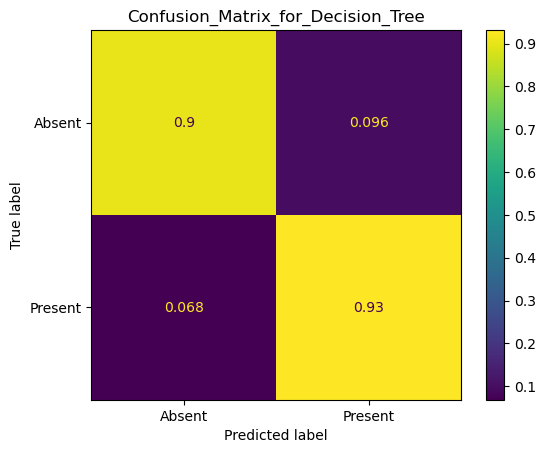

In [221]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed,y_train)
y_pred = dt.predict(X_test_transformed)
accuracy_score_dt = accuracy_score(y_test,y_pred)
print("accuracy_score_Decision_Tree: ",accuracy_score_dt)
print('\n')
print("f1_score_Decision_Tree: ",f1_score(y_test,y_pred,pos_label = 'Present'))
print('\n')
print("classification_report_Decision_Tree : ")
print("\n",classification_report(y_test,y_pred,target_names=['Absent','Present']))
cm = confusion_matrix(y_test,y_pred,labels = dt.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dt.classes_)
disp.plot()
plt.title('Confusion_Matrix_for_Decision_Tree')
plt.show()

accuracy_score_Random_Forest:  0.96


f1_score_Random_Forest:  0.9655172413793104


classification_report_Random_Forest : 

               precision    recall  f1-score   support

      Absent       0.94      0.96      0.95        83
     Present       0.97      0.96      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



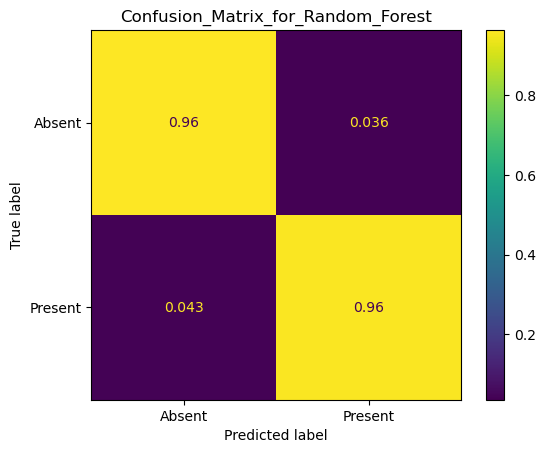

In [370]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed,y_train)
y_pred = rf.predict(X_test_transformed)
accuracy_score_rf = accuracy_score(y_test,y_pred)
print("accuracy_score_Random_Forest: ",accuracy_score_rf)
print('\n')
print("f1_score_Random_Forest: ",f1_score(y_test,y_pred,pos_label = 'Present'))
print('\n')
print("classification_report_Random_Forest : ")
print("\n",classification_report(y_test,y_pred,target_names=['Absent','Present']))
cm = confusion_matrix(y_test,y_pred,labels = rf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf.classes_)
disp.plot()
plt.title('Confusion_Matrix_for_Random_Forest')
plt.show()

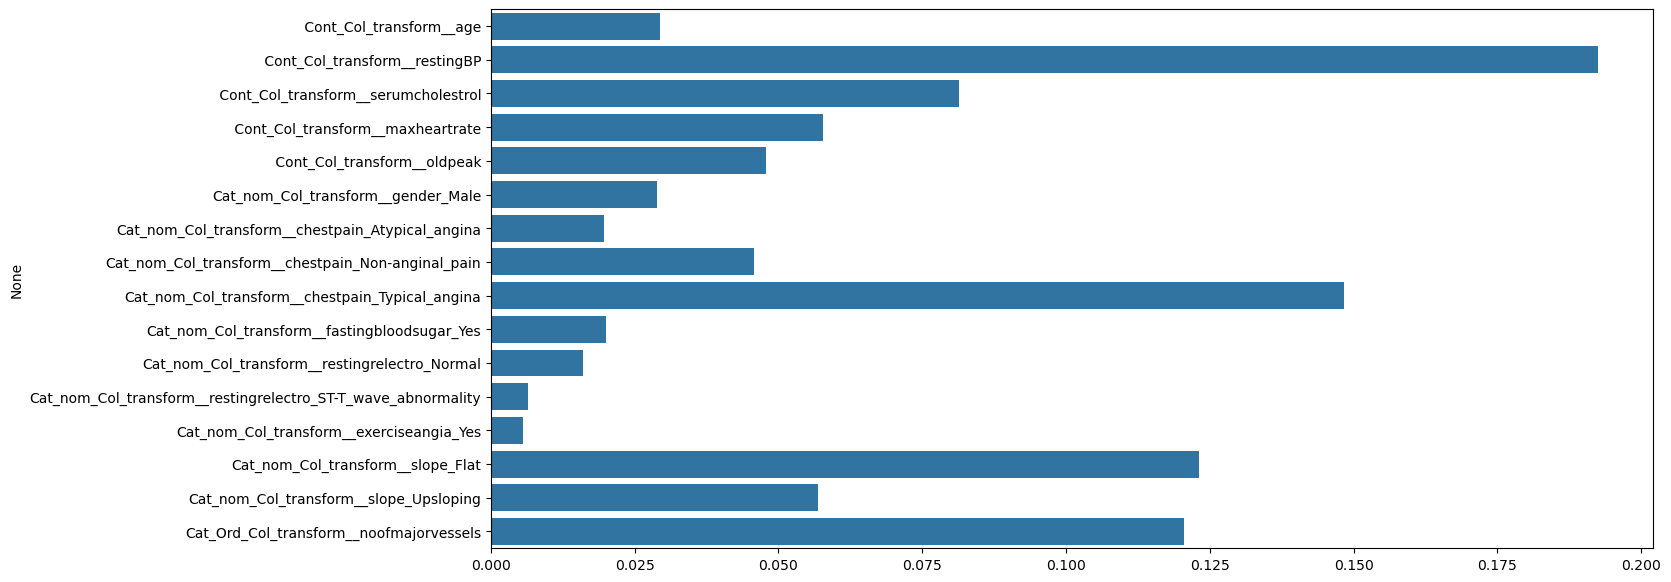

In [394]:
plt.figure(figsize=(15,7))
sns.barplot(x = rf.feature_importances_, y = X_train_transformed.columns)
plt.show()

accuracy_score_SVC:  0.945


f1_score_SVC:  0.9527896995708155


classification_report_SVC : 

               precision    recall  f1-score   support

      Absent       0.93      0.94      0.93        83
     Present       0.96      0.95      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



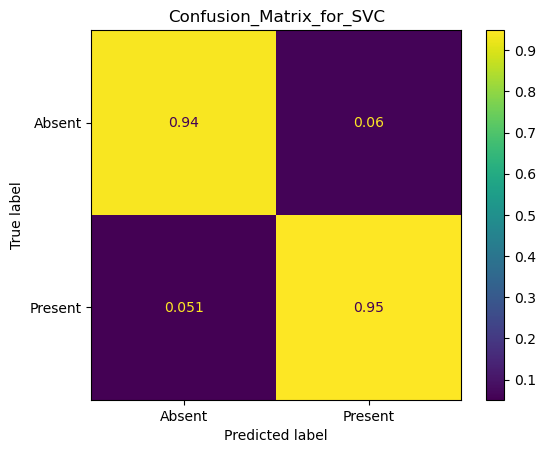

In [227]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed,y_train)
y_pred = svc.predict(X_test_transformed)
accuracy_score_svc = accuracy_score(y_test,y_pred)
print("accuracy_score_SVC: ",accuracy_score_svc)
print('\n')
print("f1_score_SVC: ",f1_score(y_test,y_pred,pos_label = 'Present'))
print('\n')
print("classification_report_SVC : ")
print("\n",classification_report(y_test,y_pred,target_names=['Absent','Present']))
cm = confusion_matrix(y_test,y_pred,labels = svc.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = svc.classes_)
disp.plot()
plt.title('Confusion_Matrix_for_SVC')
plt.show()

accuracy_score_AdaBoost:  0.945


f1_score_AdaBoost:  0.9523809523809523


classification_report_AdaBoost : 

               precision    recall  f1-score   support

      Absent       0.92      0.95      0.93        83
     Present       0.96      0.94      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



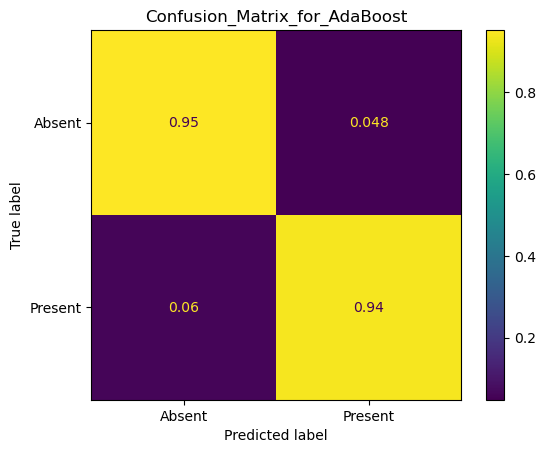

In [229]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(algorithm = 'SAMME')
abc.fit(X_train_transformed,y_train)
y_pred = abc.predict(X_test_transformed)
accuracy_score_abc = accuracy_score(y_test,y_pred)
print("accuracy_score_AdaBoost: ",accuracy_score_abc)
print('\n')
print("f1_score_AdaBoost: ",f1_score(y_test,y_pred,pos_label = 'Present'))
print('\n')
print("classification_report_AdaBoost : ")
print("\n",classification_report(y_test,y_pred,target_names=['Absent','Present']))
cm = confusion_matrix(y_test,y_pred,labels = abc.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = abc.classes_)
disp.plot()
plt.title('Confusion_Matrix_for_AdaBoost')
plt.show()

In [255]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'max_depth': range(2, 100, 5)}]

rf = RandomForestClassifier()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 100, 5)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [257]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()
print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)
cv_results.shape

Best parameters set found on train set
{'max_depth': 12}
RandomForestClassifier(max_depth=12)

Score on Test Data:  0.975


(20, 21)

In [259]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.283258,0.090241,0.013763,0.000746,2,{'max_depth': 2},0.93125,0.88125,0.88750,0.91875,...,0.90875,0.020387,20,0.917188,0.928125,0.925000,0.925000,0.898438,0.918750,0.010780
1,0.265091,0.020794,0.015558,0.001355,7,{'max_depth': 7},0.97500,0.93125,0.93750,0.95625,...,0.95375,0.017048,13,0.998437,0.996875,0.996875,0.995313,0.998437,0.997187,0.001169
2,0.255117,0.008553,0.014955,0.000886,12,{'max_depth': 12},0.97500,0.95625,0.94375,0.95625,...,0.96250,0.013693,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.278456,0.051808,0.015359,0.002326,17,{'max_depth': 17},0.96875,0.94375,0.93750,0.95625,...,0.95750,0.016008,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.306781,0.048402,0.017550,0.002568,22,{'max_depth': 22},0.97500,0.94375,0.93125,0.95000,...,0.95375,0.016105,13,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.343877,0.031220,0.018351,0.004306,27,{'max_depth': 27},0.97500,0.95000,0.94375,0.95000,...,0.95750,0.012119,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.285443,0.048011,0.016156,0.001715,32,{'max_depth': 32},0.95625,0.93750,0.94375,0.95000,...,0.95250,0.012870,19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.248131,0.009055,0.014761,0.000746,37,{'max_depth': 37},0.97500,0.93750,0.92500,0.96875,...,0.95375,0.019203,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.250935,0.009458,0.015153,0.000748,42,{'max_depth': 42},0.96875,0.93750,0.93750,0.96875,...,0.95750,0.016489,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.252331,0.008834,0.015159,0.000748,47,{'max_depth': 47},0.96875,0.95000,0.92500,0.95625,...,0.95250,0.015104,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


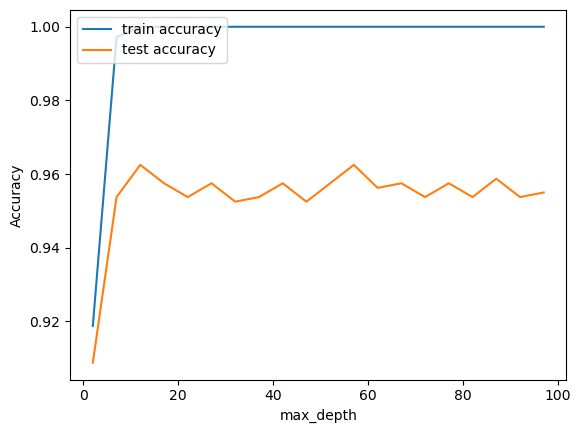

In [261]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

In [299]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'n_estimators': range(10, 1000, 300)}]

rf = RandomForestClassifier()


tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': range(10, 1000, 300)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [301]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_estimators': 610}
RandomForestClassifier(n_estimators=610)

Score on Test Data:  0.98


In [303]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051469,0.013043,0.007255,0.003142,10,{'n_estimators': 10},0.94375,0.94375,0.91250,0.93750,...,0.9375,0.013110,4,0.998437,0.998437,1.0,0.996875,1.0,0.99875,0.001169
1,0.966818,0.077400,0.043985,0.011796,310,{'n_estimators': 310},0.97500,0.93750,0.94375,0.96250,...,0.9575,0.014470,2,1.000000,1.000000,1.0,1.000000,1.0,1.00000,0.000000
2,2.157754,0.237483,0.107638,0.008335,610,{'n_estimators': 610},0.98125,0.94375,0.94375,0.95625,...,0.9575,0.013919,1,1.000000,1.000000,1.0,1.000000,1.0,1.00000,0.000000
3,3.151564,0.435083,0.146954,0.018950,910,{'n_estimators': 910},0.98125,0.93750,0.93750,0.95000,...,0.9550,0.017410,3,1.000000,1.000000,1.0,1.000000,1.0,1.00000,0.000000


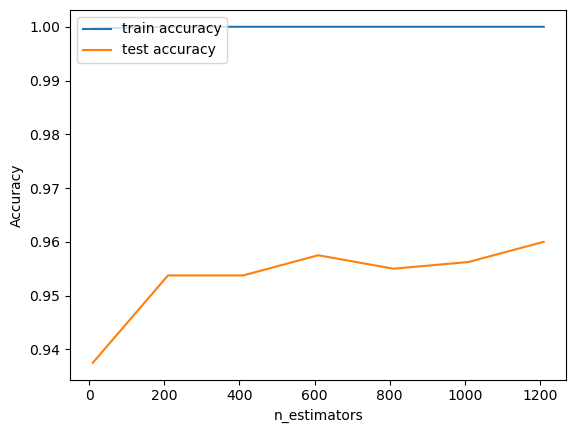

In [271]:
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

In [307]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'n_estimators': range(10, 1000, 300),'max_depth': range(2, 100, 5)}]

rf = RandomForestClassifier()


tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="accuracy",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': range(2, 100, 5),
                          'n_estimators': range(10, 1000, 300)}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [309]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()
print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)
cv_results.head()

Best parameters set found on train set
{'max_depth': 52, 'n_estimators': 610}
RandomForestClassifier(max_depth=52, n_estimators=610)

Score on Test Data:  0.97


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046631,0.024301,0.006947,0.001653,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.91875,0.84375,0.85625,...,0.87500,0.029047,80,0.914062,0.898438,0.915625,0.848437,0.887500,0.892813,0.024499
1,0.934770,0.074434,0.050594,0.011265,2,310,"{'max_depth': 2, 'n_estimators': 310}",0.93750,0.90625,0.90625,...,0.91875,0.013110,77,0.914062,0.925000,0.917188,0.931250,0.912500,0.920000,0.007085
2,2.065041,0.124368,0.148863,0.032010,2,610,"{'max_depth': 2, 'n_estimators': 610}",0.93750,0.88750,0.88750,...,0.90875,0.020000,79,0.915625,0.926562,0.918750,0.928125,0.915625,0.920937,0.005376
3,3.164374,0.127431,0.166407,0.018709,2,910,"{'max_depth': 2, 'n_estimators': 910}",0.95000,0.88750,0.89375,...,0.91500,0.024559,78,0.918750,0.928125,0.920312,0.926562,0.914062,0.921562,0.005173
4,0.044629,0.005507,0.009139,0.002334,7,10,"{'max_depth': 7, 'n_estimators': 10}",0.96250,0.95000,0.90625,...,0.94625,0.020387,65,0.981250,0.990625,0.989062,0.985938,0.985938,0.986563,0.003217


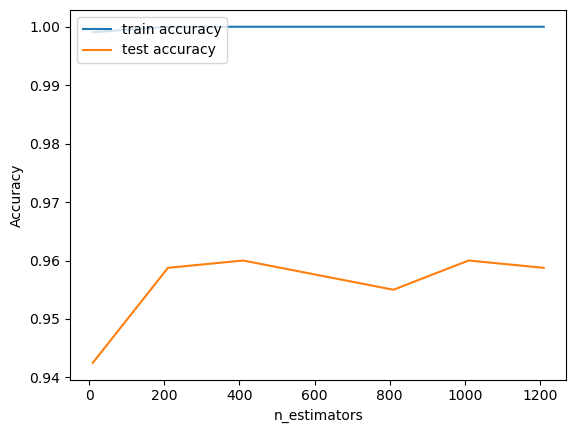

In [73]:
plt.plot(cv_results['param_n_estimators'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_estimators'], cv_results['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

In [376]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=52,
                                  n_estimators=610)

model_rf.fit(X_train_transformed, y_train)
predictions = model_rf.predict(X_test_transformed)
print(accuracy_score(y_test,predictions))

0.98


f1_score_Random_Forest:  0.9829059829059829


classification_report_Random_Forest : 

               precision    recall  f1-score   support

      Absent       0.98      0.98      0.98        83
     Present       0.98      0.98      0.98       117

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



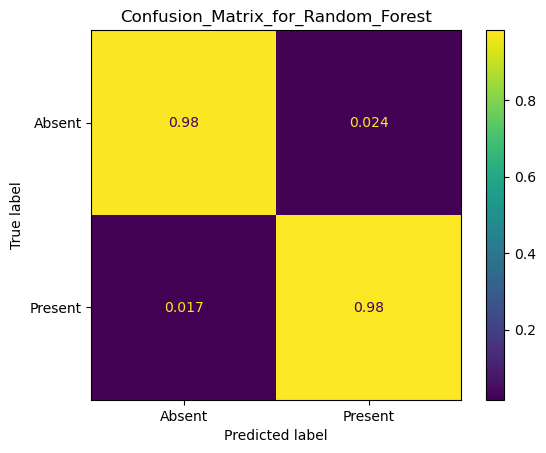

In [388]:
print("f1_score_Random_Forest: ",f1_score(y_test,predictions,pos_label = 'Present'))
print('\n')
print("classification_report_Random_Forest : ")
print("\n",classification_report(y_test,predictions,target_names=['Absent','Present']))
cm = confusion_matrix(y_test,predictions,labels = model_rf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model_rf.classes_)
disp.plot()
plt.title('Confusion_Matrix_for_Random_Forest')
plt.show()

In [390]:
model_rf.feature_importances_

array([0.02993615, 0.19920109, 0.07960296, 0.05707201, 0.0463799 ,
       0.02779445, 0.01472735, 0.05949171, 0.13696841, 0.0181677 ,
       0.01872843, 0.00721092, 0.00547547, 0.11680256, 0.05656223,
       0.12587866])

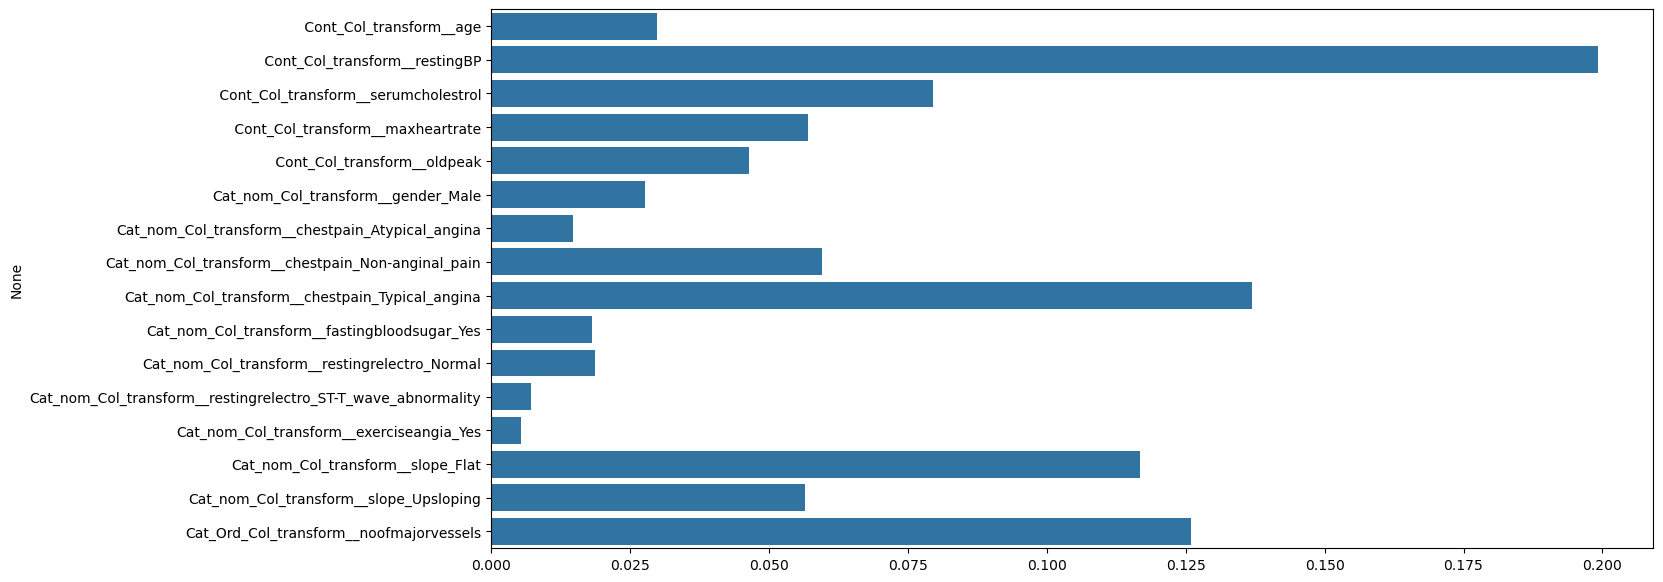

In [392]:
plt.figure(figsize=(15,7))
sns.barplot(x = model_rf.feature_importances_, y = X_train_transformed.columns)
plt.show()

In [395]:
final_pl = Pipeline(steps = [('Preprocessing',ct),
                             ('Estimator',model_rf)])

In [397]:
final_pl.fit(X_train,y_train)
y_pred_pl = final_pl.predict(X_test)

In [399]:
final_pl

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[(' Cont_Col_transform',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   MinMaxScaler()),
                                                                  ('Transformation',
                                                                   PowerTransformer(standardize=False))]),
                                                  [0, 3, 4, 7, 9]),
                                                 ('Cat_nom_Col_transform',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequ...
                                                  [1, 2, 5, 6, 8, 10]),
                                                 ('Cat_Ord_Col_transform',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder(categories=[['Zero',
                                                                                               'One',
                                                                                               'Two',
                                                                                               'Three']],
                                                                                  encoded_missing_value=-5,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  [11])])),
                ('Estimator',
                 RandomForestClassifier(max_depth=52, n_estimators=610))])

In [401]:
import pickle
pickle.dump(final_pl,open('rfc.pkl','wb'))

In [403]:
pr = pickle.load(open('rfc.pkl','rb'))

In [405]:
pr

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[(' Cont_Col_transform',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   MinMaxScaler()),
                                                                  ('Transformation',
                                                                   PowerTransformer(standardize=False))]),
                                                  [0, 3, 4, 7, 9]),
                                                 ('Cat_nom_Col_transform',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequ...
                                                  [1, 2, 5, 6, 8, 10]),
                                                 ('Cat_Ord_Col_transform',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal '
                                                                   'Encoding',
                                                                   OrdinalEncoder(categories=[['Zero',
                                                                                               'One',
                                                                                               'Two',
                                                                                               'Three']],
                                                                                  encoded_missing_value=-5,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  [11])])),
                ('Estimator',
                 RandomForestClassifier(max_depth=52, n_estimators=610))])

In [421]:
pr.predict([[np.nan,'Male','Typical_angina',250,386,'No','ST-T_wave_abnormality',115,'No',3.7,'Upsloping','Three']])

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Absent'], dtype=object)

In [413]:
fi_df = pd.DataFrame({'featutes':final_pl[0].get_feature_names_out(),'importance':model_rf.feature_importances_})

In [415]:
fi_df

,featutes,importance
0,Cont_Col_transform__age,0.030495
1,Cont_Col_transform__restingBP,0.198616
2,Cont_Col_transform__serumcholestrol,0.082233
3,Cont_Col_transform__maxheartrate,0.056420
4,Cont_Col_transform__oldpeak,0.048140
5,Cat_nom_Col_transform__gender_Male,0.028987
6,Cat_nom_Col_transform__chestpain_Atypical_angina,0.014299
7,Cat_nom_Col_transform__chestpain_Non-anginal_pain,0.062317
8,Cat_nom_Col_transform__chestpain_Typical_angina,0.127519
9,Cat_nom_Col_transform__fastingbloodsugar_Yes,0.017863


In [232]:
sorted_df = fi_df.sort_values(by='importance', ascending=False)

# Display the sorted DataFrame
print(sorted_df)

                                             featutes  importance
1                       Cont_Col_transform__restingBP    0.190897
8     Cat_nom_Col_transform__chestpain_Typical_angina    0.148035
15            Cat_Ord_Col_transform__noofmajorvessels    0.121615
13                  Cat_nom_Col_transform__slope_Flat    0.108532
2                 Cont_Col_transform__serumcholestrol    0.073765
14             Cat_nom_Col_transform__slope_Upsloping    0.068344
3                    Cont_Col_transform__maxheartrate    0.059088
7   Cat_nom_Col_transform__chestpain_Non-anginal_pain    0.054933
4                         Cont_Col_transform__oldpeak    0.049598
0                             Cont_Col_transform__age    0.034000
5                  Cat_nom_Col_transform__gender_Male    0.026984
9        Cat_nom_Col_transform__fastingbloodsugar_Yes    0.019495
10      Cat_nom_Col_transform__restingrelectro_Normal    0.017452
6    Cat_nom_Col_transform__chestpain_Atypical_angina    0.014724
11  Cat_no

## ANN MODEL

In [397]:
heart_disease_dummies = df["heartdisease"].map({'Present':1,'Absent':0})

In [399]:
y = heart_disease_dummies

In [401]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train_transformed = pd.DataFrame(ct.fit_transform(X_train),columns = ct.get_feature_names_out(),index = X_train.index)
X_test_transformed = pd.DataFrame(ct.transform(X_test),columns = ct.get_feature_names_out(),index = X_test.index)

In [403]:
from keras.models import Sequential
from keras.layers import Dense

In [404]:
classifier = Sequential()

In [405]:
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train_transformed.shape[1]))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [406]:
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))

In [407]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [408]:
classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [415]:
classifier.fit(X_train_transformed, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5943 - loss: 0.6919
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5596 - loss: 0.6895
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5831 - loss: 0.6852
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5822 - loss: 0.6837
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6110 - loss: 0.6771
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5891 - loss: 0.6801
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6063 - loss: 0.6755
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 0.6778
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5373 - loss: 0.6916
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5395 - loss: 0.6913
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5756 - loss: 0.6817
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [417]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319 (1.25 KB)

 Trainable params: 317 (1.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [419]:
score, acc = classifier.evaluate(X_train_transformed, y_train,
                            batch_size=10)

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9329 - loss: 0.2178


In [421]:
print('Train score:', score)
print('Train accuracy:', acc)

Train score: 0.22184112668037415
Train accuracy: 0.925000011920929


In [427]:
y_pred = classifier.predict(X_test_transformed)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test_transformed, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred,normalize = 'true')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
********************
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9223 - loss: 0.1974
Test score: 0.1607600450515747
Test accuracy: 0.9350000023841858


Text(0.5, 23.52222222222222, 'Predicted label')

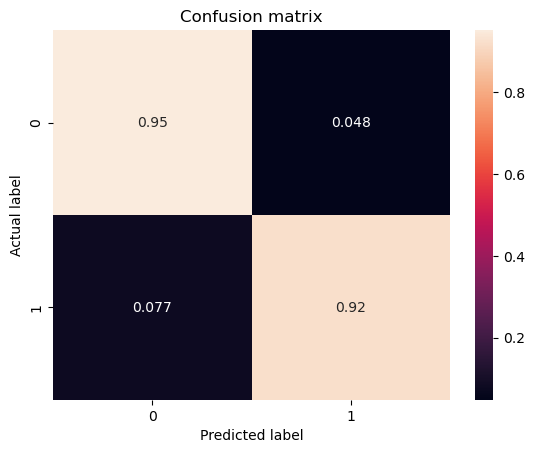

In [429]:
p = sns.heatmap(pd.DataFrame(cm),annot = True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [431]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        83
           1       0.96      0.92      0.94       117

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [439]:
print(f1_score(y_test,y_pred,pos_label = 1))

0.9432314410480349
